In [92]:
# Import required libraries and dependencies
#setenv OMP_NUM_THREADS 1
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [93]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [94]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [95]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [96]:
# Create a DataFrame with the scaled data
normalized_data = scaler.fit_transform(market_data_df)

# Copy the crypto names from the original data
crypto_names_list = market_data_df.index.values.tolist()
#market_data_df = market_data_df.reset_index()
normalized_df = pd.DataFrame(normalized_data,columns=market_data_df.columns)
normalized_df['coin_id'] = crypto_names_list

# Set the coinid column as index
normalized_df = normalized_df.set_index('coin_id')

# Display sample data
normalized_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [97]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = [1,2,3,4,5,6,7,8,9,10,11]

# Create an empty list to store the inertia values
inertias = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, n_init='auto', random_state=1)
    model.fit(normalized_df)
    inertias.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
dictionary = {'x_values':k_values, 'y_values' : inertias}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(dictionary)

# Display the DataFrame
elbow_curve_df


c:\Users\skfot\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\skfot\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\skfot\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\skfot\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is k

,x_values,y_values
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


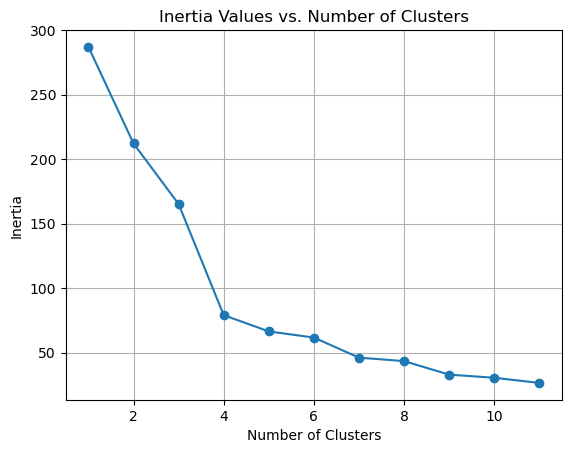

In [98]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_curve_df['x_values'], elbow_curve_df['y_values'], 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia Values vs. Number of Clusters')
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [99]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [100]:
# Fit the K-Means model using the scaled data
model.fit(normalized_df)

c:\Users\skfot\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [101]:
# Predict the clusters to group the cryptocurrencies using the scaled data

# View the resulting array of cluster values.
model.labels_

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [102]:
# Create a copy of the DataFrame
copy_normalized_df = normalized_df

In [103]:
# Add a new column to the DataFrame with the predicted clusters
copy_normalized_df['kmeans_4'] = model.labels_

# Display sample data
copy_normalized_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,kmeans_4
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,3
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,3
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,3
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,3


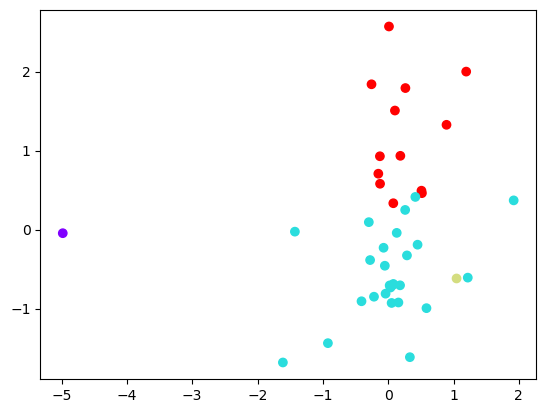

In [117]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
plt.scatter(x=copy_normalized_df['price_change_percentage_24h'], 
            y=copy_normalized_df['price_change_percentage_7d'], 
            c=copy_normalized_df['kmeans_4'], 
            cmap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [118]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [123]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
scores = pca.fit_transform(normalized_df)
scores_df = pd.DataFrame(scores, columns =['PCA1','PCA2','PCA3'])

# View the first five rows of the DataFrame. 
scores_df.head()

,PCA1,PCA2,PCA3
0,1.585139,0.134394,0.545621
1,1.322581,0.054494,1.115709
2,-0.266335,-0.536409,-0.796946
3,-0.257225,-0.592013,-0.646529
4,2.952250,0.422372,1.267894


In [124]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37005408, 0.32322221, 0.19115222])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [134]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
coinid_list = list(market_data_df.index.values)

# Copy the crypto names from the original data
scores_df['coin_id'] = coinid_list

# Set the coinid column as index
scores_df = scores_df.set_index('coin_id')

# Display sample data
scores_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,1.585139,0.134394,0.545621
ethereum,1.322581,0.054494,1.115709
tether,-0.266335,-0.536409,-0.796946
ripple,-0.257225,-0.592013,-0.646529
bitcoin-cash,2.952250,0.422372,1.267894


### Find the Best Value for k Using the PCA Data

In [135]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = [1,2,3,4,5,6,7,8,9,10,11]

# Create an empty list to store the inertia values
inertias = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, n_init='auto', random_state=1)
    model.fit(scores_df)
    inertias.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
dictionary = {'x_values':k_values, 'y_values' : inertias}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(dictionary)

# Display the DataFrame
elbow_curve_df


c:\Users\skfot\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\skfot\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\skfot\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\skfot\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is k

,x_values,y_values
0,1,287.007838
1,2,198.675508
2,3,119.704019
3,4,43.205879
4,5,33.042435
5,6,24.347640
6,7,21.723241
7,8,19.785418
8,9,16.206791
9,10,9.482300


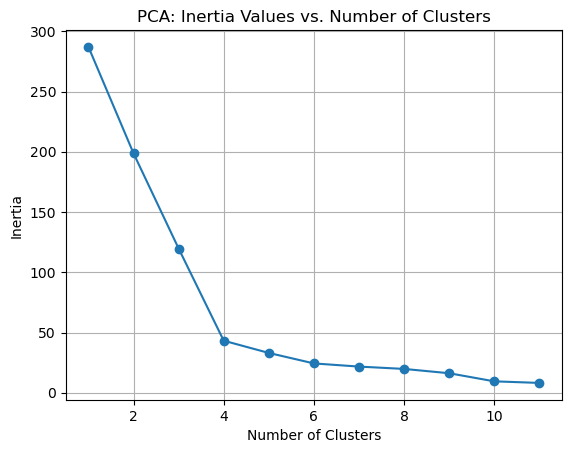

In [142]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_curve_df['x_values'], elbow_curve_df['y_values'], 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('PCA: Inertia Values vs. Number of Clusters')
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [137]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [139]:
# Fit the K-Means model using the PCA data
model.fit(scores_df)

c:\Users\skfot\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [140]:
# Predict the clusters to group the cryptocurrencies using the PCA data


# Print the resulting array of cluster values.
model.labels_

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 1, 1, 0, 1, 1, 1, 1])

In [141]:
# Create a copy of the DataFrame with the PCA data
copy_scores_df = scores_df

# Add a new column to the DataFrame with the predicted clusters
copy_scores_df['kmeans_4'] = model.labels_

# Display sample data
copy_scores_df.head()

,PCA1,PCA2,PCA3,kmeans_4
coin_id,,,,
bitcoin,1.585139,0.134394,0.545621,3
ethereum,1.322581,0.054494,1.115709,3
tether,-0.266335,-0.536409,-0.796946,1
ripple,-0.257225,-0.592013,-0.646529,1
bitcoin-cash,2.952250,0.422372,1.267894,3


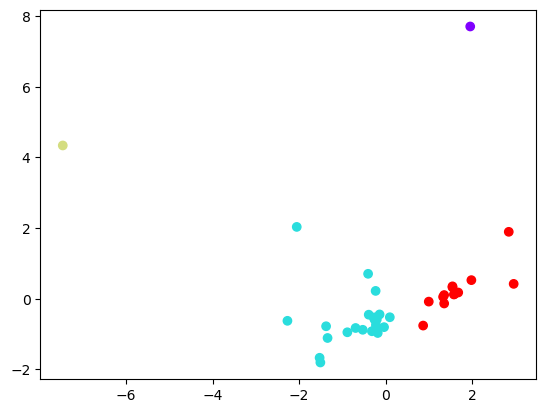

In [143]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
plt.scatter(x=copy_scores_df['PCA1'], 
            y=copy_scores_df['PCA2'], 
            c=copy_scores_df['kmeans_4'], 
            cmap='rainbow')

### Determine the Weights of Each Feature on each Principal Component

In [116]:
# Use the columns from the original scaled DataFrame as the index.


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    